In [1]:
import json
import pandas as pd

# Sample game data
with open("steamGames.json", "r") as f:
    game_data = json.load(f)['applist']['apps']

# Sample user game data
with open("vadimOwnedGames.json", "r") as f:
    user_game_data = json.load(f)["response"]["games"]

# Convert to DataFrame
game_df = pd.DataFrame(game_data)
user_games_df = pd.DataFrame(user_game_data)
# game_df

In [2]:
# Extract unique categories, developers, publishers, and genres
categories = game_df['categories'].explode().unique()
genres = game_df['genres'].explode().unique()

# Create binary features for categories, developers, publishers, and genres
for category in categories:
    game_df[f'category_{category}'] = game_df['categories'].apply(lambda x: 1 if type(x) == list and category in x else 0)

for genre in genres:
    game_df[f'genre_{genre}'] = game_df['genres'].apply(lambda x: 1 if type(x) == list and genre in x else 0)

# Create binary features for platforms
platforms = ['windows', 'mac', 'linux']
for platform in platforms:
    game_df[f'platform_{platform}'] = game_df['platforms'].apply(lambda x: x.get(platform, False))

# game_df['price_overview'] = game_df['price_overview'].fillna(0)
game_df['recommendations'] = game_df['recommendations'].fillna(0)
game_df['metacritic'] = game_df['metacritic'].fillna(game_df['metacritic'].mean())

# Drop original columns
game_df.drop(columns=['categories', 'developers', 'publishers', 'genres', 'platforms', 'release_date', 'price_overview', 'name'], inplace=True)

# Set appid as index
game_df.set_index('appid', inplace=True)

game_df.head()


C:\Users\rolud\AppData\Local\Temp\ipykernel_8892\3957598019.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_df[f'genre_{genre}'] = game_df['genres'].apply(lambda x: 1 if type(x) == list and genre in x else 0)
C:\Users\rolud\AppData\Local\Temp\ipykernel_8892\3957598019.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_df[f'genre_{genre}'] = game_df['genres'].apply(lambda x: 1 if type(x) == list and genre in x else 0)
C:\Users\rolud\AppData\Local\Temp\ipykernel_8892\3957598019.py:10: PerformanceWarning: DataFrame

,recommendations,metacritic,category_Single-player,category_Steam Achievements,category_Full controller support,category_Steam Trading Cards,category_Steam Cloud,category_Family Sharing,category_Multi-player,category_PvP,...,genre_Экшены,genre_Инди,genre_Ролевые игры,genre_Симуляторы,genre_Стратегии,genre_Strategi,genre_Gratuito p/ Jogar,platform_windows,platform_mac,platform_linux
appid,,,,,,,,,,,,,,,,,,,,,
2409320,0.0,79.115942,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,False,True
2409360,171.0,79.115942,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,True,False,False
2409390,0.0,79.115942,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,True,False,False
2409400,0.0,79.115942,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
2409410,0.0,79.115942,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,True,False,False


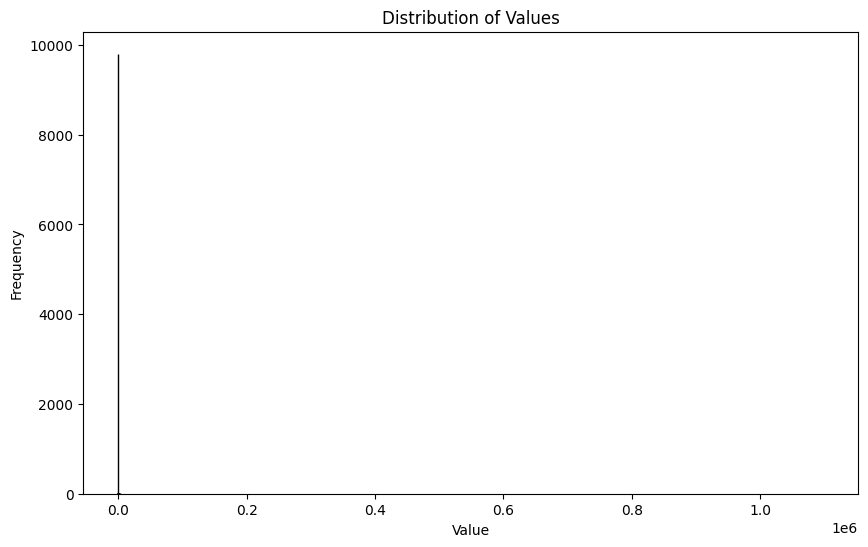

In [21]:
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics
import statistics
import numpy as np

# train, test = model_selection.train_test_split(game_df)

# X_train = train[train.columns[2:]]
# Y_train = train[["recommendations", "metacritic"]]

# X_test = test[train.columns[2:]]
# Y_test = test[["recommendations", "metacritic"]]

# model = linear_model.LinearRegression()
# model.fit(X_train, Y_train)

# mse_train = metrics.mean_squared_error(Y_train, model.predict(X_train))
# mse_test = metrics.mean_squared_error(Y_test, model.predict(X_test))

# print(mse_train)
# print(mse_test)

# statistics.mean(game_df["recommendations"])
values, counts = np.unique(game_df["recommendations"].filter(), return_counts=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(values, counts, width=1.0, edgecolor='black')

# Adding title and labels
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = pd.concat([pd.DataFrame(genres_encoded), pd.DataFrame(categories_encoded)], axis=1)
y = games['recommendations'].apply(lambda x: 1 if x > 100 else 0)  # Exemples de recommandations binaires

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


TypeError: can only join an iterable

Test